# **Import Model**

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Load Dataset**

In [2]:
data = pd.read_csv('/content/twitter_toxic_tweets.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# **Data Cleaning**

In [3]:
data.shape

(31962, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
data.isnull().sum()

,0
id,0
label,0
tweet,0


In [5]:
data['label'].value_counts()

,count
label,
0,29720
1,2242


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\S+|#\S+|[^a-z\s]", "", text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

In [8]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
data['clean_tweet'] = data['tweet'].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data[['tweet', 'clean_tweet']].head(10)

,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunction
1,@user @user thanks for #lyft credit i can't us...,thanks credit cant use cause dont offer wheelc...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,love u take u time ur
4,factsguide: society now #motivation,factsguide society
5,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...
6,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,the next school year is the year for exams.ð...,next school year year exam cant think
8,we won!!! love the land!!! #allin #cavs #champ...,love land
9,@user @user welcome here ! i'm it's so #gr...,welcome im


# **EDA**

In [15]:
positive_tweets = data[data['label'] == 0]['clean_tweet']
negative_tweets = data[data['label'] == 1]['clean_tweet']

In [16]:
positive_text = " ".join(positive_tweets)
negative_text = " ".join(negative_tweets)

In [13]:
pip install wordcloud matplotlib

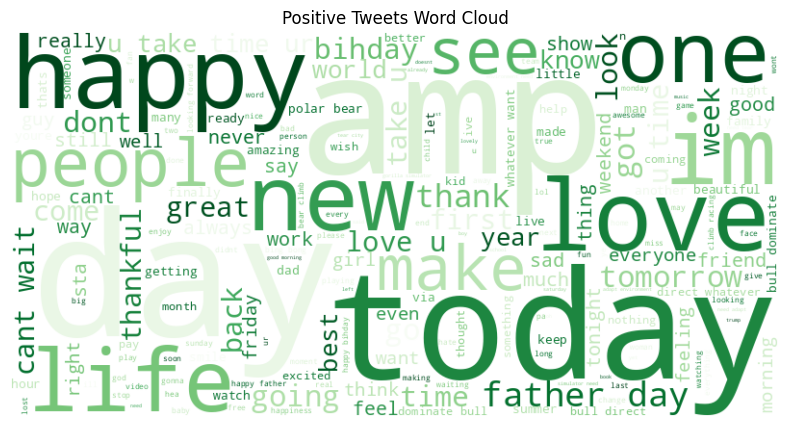

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

wc_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens'
).generate(positive_text)

plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Tweets Word Cloud")
plt.show()

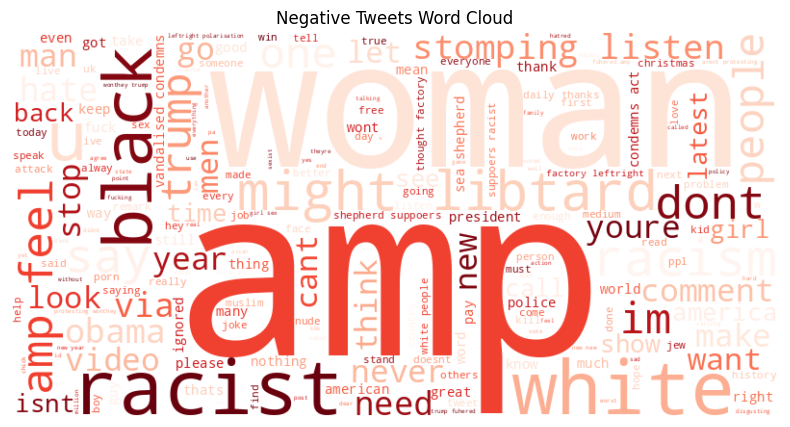

In [18]:
plt.figure(figsize=(10,5))

wc_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds'
).generate(negative_text)

plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweets Word Cloud")
plt.show()


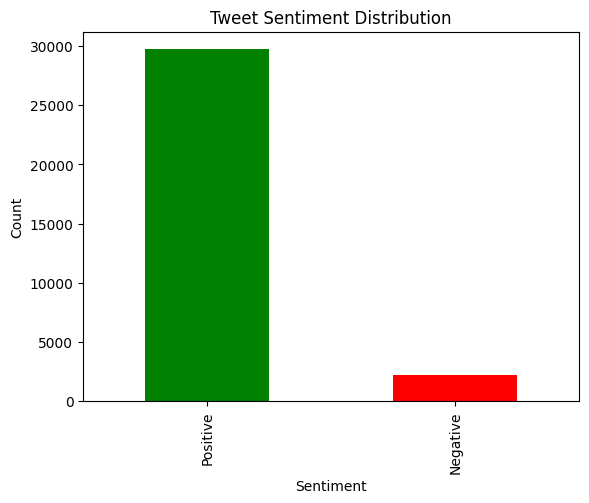

In [21]:
import matplotlib.pyplot as plt
# Map numeric labels to text
label_names = {0: "Positive", 1: "Negative"}
data['label'].value_counts().plot(
    kind='bar',
    color=['green', 'red']
)
plt.title("Tweet Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
# Replace x-axis tick labels with descriptive names
plt.xticks(
    ticks=range(len(data['label'].value_counts())),
    labels=[label_names[i] for i in data['label'].value_counts().index]
)
plt.show()

In [25]:
from collections import Counter

positive_words = positive_text.split()
negative_words = negative_text.split()

pos_counts = Counter(positive_words)
neg_counts = Counter(negative_words)

top_positive = pos_counts.most_common(20)
top_negative = neg_counts.most_common(20)

print("Top Positive Words:")
print(top_positive)

print("\nTop Negative Words:")
print(top_negative)

Top Positive Words:
[('day', 2513), ('happy', 1565), ('u', 1545), ('amp', 1328), ('love', 1233), ('time', 1162), ('im', 1105), ('today', 1000), ('get', 941), ('like', 862), ('new', 857), ('life', 805), ('make', 782), ('one', 779), ('cant', 774), ('good', 762), ('people', 740), ('see', 733), ('father', 721), ('go', 702)]

Top Negative Words:
[('amp', 282), ('like', 140), ('white', 137), ('racist', 110), ('woman', 101), ('black', 100), ('people', 84), ('trump', 81), ('might', 77), ('u', 76), ('libtard', 73), ('dont', 66), ('racism', 65), ('new', 64), ('feel', 60), ('say', 58), ('listen', 57), ('get', 51), ('one', 50), ('girl', 49)]


In [29]:
import pandas as pd

top_pos_df = pd.DataFrame(top_positive, columns=['Word', 'Frequency'])
top_neg_df = pd.DataFrame(top_negative, columns=['Word', 'Frequency'])

print(top_pos_df)
print(top_neg_df)

      Word  Frequency
0      day       2513
1    happy       1565
2        u       1545
3      amp       1328
4     love       1233
5     time       1162
6       im       1105
7    today       1000
8      get        941
9     like        862
10     new        857
11    life        805
12    make        782
13     one        779
14    cant        774
15    good        762
16  people        740
17     see        733
18  father        721
19      go        702
       Word  Frequency
0       amp        282
1      like        140
2     white        137
3    racist        110
4     woman        101
5     black        100
6    people         84
7     trump         81
8     might         77
9         u         76
10  libtard         73
11     dont         66
12   racism         65
13      new         64
14     feel         60
15      say         58
16   listen         57
17      get         51
18      one         50
19     girl         49


# **Logistic Regression**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['clean_tweet']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=7000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9450961989676209

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.90      0.24      0.38       448

    accuracy                           0.95      6393
   macro avg       0.92      0.62      0.68      6393
weighted avg       0.94      0.95      0.93      6393


Confusion Matrix:
 [[5933   12]
 [ 339  109]]


# **Cross Validation**

In [32]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)

print("Cross Validation Accuracy:", scores.mean())

Cross Validation Accuracy: 0.9430952533746326


# **Hyperparameter Tuning**

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000),
                    param_grid,
                    cv=5)

grid.fit(X_train_tfidf, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l2'}


# **ROC Curve**

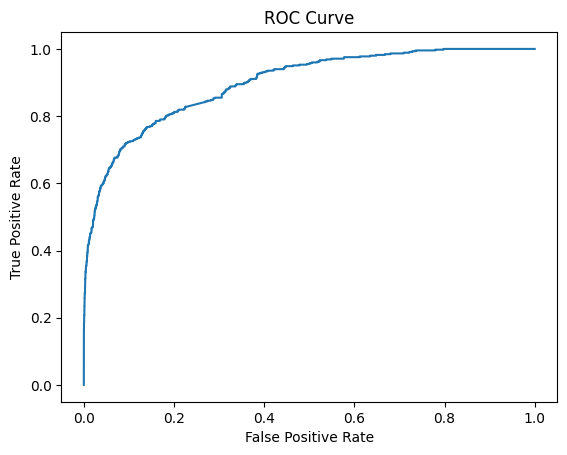

AUC Score: 0.8976940781569145


In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = grid.best_estimator_.predict_proba(X_test_tfidf)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("AUC Score:", roc_auc)

# **Naive Bayes**

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9444705146253715
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       0.99      0.21      0.35       448

    accuracy                           0.94      6393
   macro avg       0.97      0.60      0.66      6393
weighted avg       0.95      0.94      0.93      6393



# **SVM**

In [31]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9490067261066791
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5945
           1       0.74      0.42      0.54       448

    accuracy                           0.95      6393
   macro avg       0.85      0.70      0.75      6393
weighted avg       0.94      0.95      0.94      6393



# **Thank You**